In [2]:
# Dependencies
from IPython.display import display, Math, Latex
import numpy as np
import matplotlib.pyplot as plt

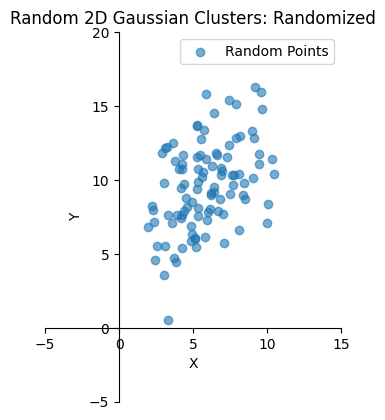

In [3]:
# Parameters
num_sets = 1          # number of Gaussian clusters
num_points = 100      # number of points
dim = 2               # 2D data
np.random.seed(42)    # for reproducibility
cov = [[5,4],         # covariance matrix
       [4,12]]

# Create the plot
fig, ax = plt.subplots()    
ax.set_xlim(-5, 15)
ax.set_ylim(-5, 20)
ax.set_aspect('equal')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Generate Gaussian-distributed data
data = np.random.multivariate_normal([6,10], cov, size=num_points)
data_std = (data - data.mean(axis=0)) / data.std(axis=0)

# Plot each cluster
plt.scatter(data[:, 0],
            data[:, 1],
            alpha=0.6,
            label='Random Points'
            )

plt.title('Random 2D Gaussian Clusters: Randomized')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

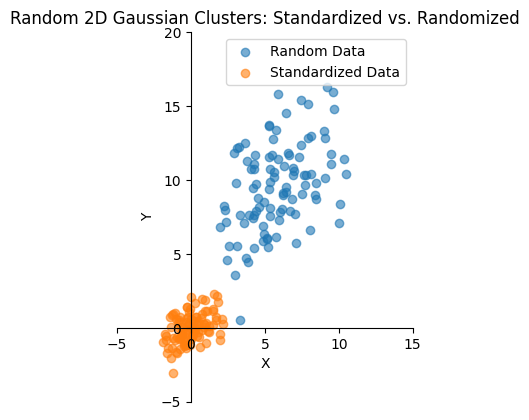

In [4]:
# Parameters
num_sets = 1          # number of Gaussian clusters
num_points = 100      # number of points
dim = 2               # 2D data
np.random.seed(42)    # for reproducibility
cov = [[5,4],         # covariance matrix
       [4,12]]

# Create the plot
fig, ax = plt.subplots()    
ax.set_xlim(-5, 15)
ax.set_ylim(-5, 20)
ax.set_aspect('equal')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Generate Gaussian-distributed data
data = np.random.multivariate_normal([6,10], cov, size=num_points)
data_std = (data - data.mean(axis=0)) / data.std(axis=0)

# Plot each cluster
plt.scatter(data[:, 0],
            data[:, 1],
            alpha=0.6,
            label='Random Data'
            )
plt.scatter(data_std[:, 0],
            data_std[:, 1],
            alpha=0.6,
            label='Standardized Data'
            )

plt.title('Random 2D Gaussian Clusters: Standardized vs. Randomized')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

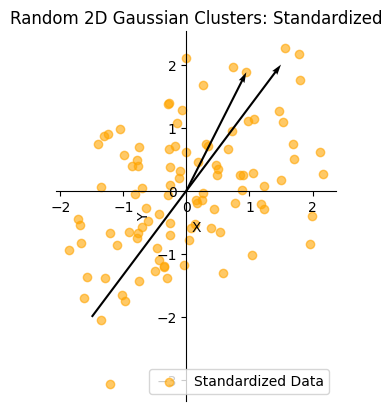

In [121]:
# Parameters
num_sets = 1          # number of Gaussian clusters
num_points = 100      # number of points
dim = 2               # 2D data
np.random.seed(42)    # for reproducibility
cov = [[5,4],         # covariance matrix
       [4,12]]

# Create the plot
fig, ax = plt.subplots()    
ax.set_aspect('equal')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Generate Gaussian-distributed data
data = np.random.multivariate_normal([6,10], cov, size=num_points)
data_std = (data - data.mean(axis=0)) / data.std(axis=0)

plt.scatter(data_std[:, 0],
            data_std[:, 1],
            alpha=0.6,
            label='Standardized Data',
            color='orange'
            )

ax.quiver(-1.5, -2, 6, 8, angles='xy', scale_units='xy', scale=2)
ax.quiver(0, 0, data_std[10][0], data_std[10][1], angles='xy', scale_units='xy', scale=1)

plt.title('Random 2D Gaussian Clusters: Standardized')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

The formula for projection is

$$
{Proj}_{\textbf{u}}\textbf{v}=\frac{\textbf{u} \cdot \textbf{v}}{||\textbf{u}||^2}\textbf{u}
$$

In [123]:
# Implementing projection formula
u = np.array([3, 4]) # Our Principal Component
v = data_std[10] # A data point
u_dot_v = np.dot(u, v)
u_norm = np.linalg.norm(u)

projection = (u_dot_v / u_norm**2) * u

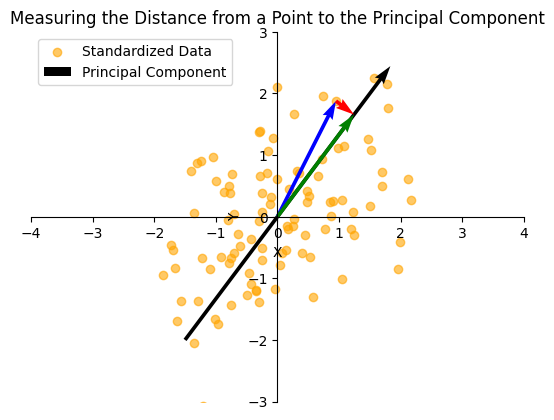

In [124]:
# Parameters
num_sets = 1          # number of Gaussian clusters
num_points = 100      # number of points
dim = 2               # 2D data
np.random.seed(42)    # for reproducibility
cov = [[5,4],         # covariance matrix
       [4,12]]

# Create the plot
fig, ax = plt.subplots()
ax.set_xlim(-4, 4)
ax.set_ylim(-3, 3)
ax.set_aspect('equal')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Generate Gaussian-distributed data
data = np.random.multivariate_normal([6,10], cov, size=num_points)
data_std = (data - data.mean(axis=0)) / data.std(axis=0)

plt.scatter(data_std[:, 0],
            data_std[:, 1],
            alpha=0.6,
            label='Standardized Data',
            color='orange'
            )

ax.quiver(-1.5,
          -2,
          6,
          8,
          angles='xy', scale_units='xy', scale=1.8, label='Principal Component') # vector u
ax.quiver(0,
          0,
          data_std[10][0],
          data_std[10][1],
          angles='xy', scale_units='xy', scale=1, color='blue') # vector v
ax.quiver(0,
          0,
          projection[0],
          projection[1],
          angles='xy', scale_units='xy', scale=1, color='green') # projection
ax.quiver(data_std[10][0],
          data_std[10][1],
          projection[0]-data_std[10][0],
          projection[1]-data_std[10][1],
          angles='xy', scale_units='xy', scale=1, color='red') # residual vector


plt.title('Measuring the Distance from a Point to the Principal Component')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

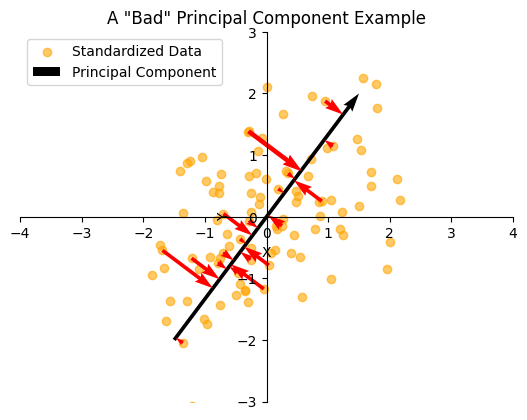

In [125]:
# A "bad" principal component example
# Parameters
num_sets = 1          # number of Gaussian clusters
num_points = 100      # number of points
dim = 2               # 2D data
np.random.seed(42)    # for reproducibility
cov = [[5,4],         # covariance matrix
       [4,12]]

# Create the plot
fig, ax = plt.subplots()
ax.set_xlim(-4, 4)
ax.set_ylim(-3, 3)
ax.set_aspect('equal')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Generate Gaussian-distributed data
data = np.random.multivariate_normal([6,10], cov, size=num_points)
data_std = (data - data.mean(axis=0)) / data.std(axis=0)

plt.scatter(data_std[:, 0],
            data_std[:, 1],
            alpha=0.6,
            label='Standardized Data',
            color='orange'
            )

v_start = [-1.5, -2]
v_end = [1.5, 2]
ax.quiver(v_start[0],
          v_start[1],
          v_end[0]-v_start[0],
          v_end[1]-v_start[1],
          angles='xy', scale_units='xy', scale=1, label='Principal Component') # vector u

for i in np.random.choice(np.arange(data_std.shape[0]), 20, replace=False):
    # Calculate projections for 10 random points!
    u = np.array([v_end[0]-v_start[0], v_end[1]-v_start[1]]) # Our principal component
    v = data_std[i] # A data point
    u_dot_v = np.dot(u, v) # Dot product between data point and principal component
    u_norm = np.linalg.norm(u) # Norm of principal component vector
    projection = (u_dot_v / u_norm**2) * u
    ax.quiver(data_std[i][0],
              data_std[i][1],
              projection[0]-data_std[i][0],
              projection[1]-data_std[i][1],
              angles='xy', scale_units='xy', scale=1, color='red') # residual vector

plt.title('A "Bad" Principal Component Example')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

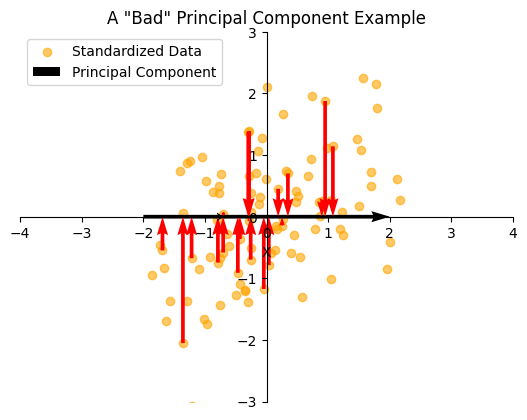

In [126]:
# A "bad" principal component example
# Parameters
num_sets = 1          # number of Gaussian clusters
num_points = 100      # number of points
dim = 2               # 2D data
np.random.seed(42)    # for reproducibility
cov = [[5,4],         # covariance matrix
       [4,12]]

# Create the plot
fig, ax = plt.subplots()
ax.set_xlim(-4, 4)
ax.set_ylim(-3, 3)
ax.set_aspect('equal')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Generate Gaussian-distributed data
data = np.random.multivariate_normal([6,10], cov, size=num_points)
data_std = (data - data.mean(axis=0)) / data.std(axis=0)

plt.scatter(data_std[:, 0],
            data_std[:, 1],
            alpha=0.6,
            label='Standardized Data',
            color='orange'
            )


v_start = [-2, 0]
v_end = [2, 0]
ax.quiver(v_start[0],
          v_start[1],
          v_end[0]-v_start[0],
          v_end[1]-v_start[1],
          angles='xy', scale_units='xy', scale=1, label='Principal Component') # vector u

for i in np.random.choice(np.arange(data_std.shape[0]), 20, replace=False):
    # Calculate projections for 10 random points!
    u = np.array([v_end[0]-v_start[0], v_end[1]-v_start[1]]) # Our principal component
    v = data_std[i] # A data point
    u_dot_v = np.dot(u, v) # Dot product between data point and principal component
    u_norm = np.linalg.norm(u) # Norm of principal component vector
    projection = (u_dot_v / u_norm**2) * u
    ax.quiver(data_std[i][0],
              data_std[i][1],
              projection[0]-data_std[i][0],
              projection[1]-data_std[i][1],
              angles='xy', scale_units='xy', scale=1, color='red') # residual vector

plt.title('A "Bad" Principal Component Example')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

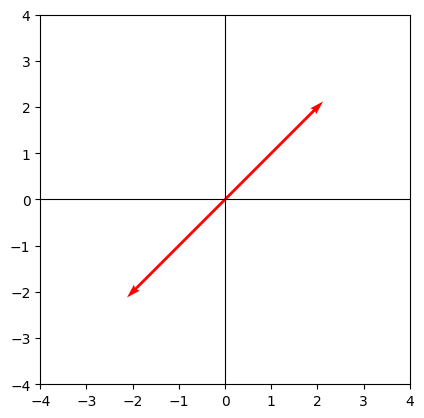

In [127]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

# Parameters
x0, y0 = 0, 0
direction = np.pi / 4   # 45° direction
length = 3

# Vector components
a = length * np.cos(direction)
b = length * np.sin(direction)

# Draw the vector in both directions
ax.quiver(x0, y0,  a,  b, angles='xy', scale_units='xy', scale=1, color='r')
ax.quiver(x0, y0, -a, -b, angles='xy', scale_units='xy', scale=1, color='r')

# Reference lines
ax.axhline(0, color='k', linewidth=0.8)
ax.axvline(0, color='k', linewidth=0.8)

ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_aspect('equal')
plt.show()


The formula for distance to the principal component is

$$
\textbf{r} = 
\tilde{\textbf{x}} - {Proj}_{\textbf{p}}\tilde{\textbf{x}} = 
\tilde{\textbf{x}} - \frac{\textbf{p} \cdot \tilde{\textbf{x}}}
{||\textbf{p}||^2}\textbf{p}
$$

Where:


- $\textbf{r} \text{ is the residual vector (distance to principal component)}$
- $\tilde{\textbf{x}} \text{ is the standardized data point}$
- $\textbf{p} \text{ is the principal component vector}$

A principal component should have the following characteristics: